In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
from radioReduction import *
from astropy.stats import LombScargle
from scipy import optimize
from scipy.interpolate import make_interp_spline, BSpline
import glob

import numpy as np
import pandas as pd
from radioReduction import *
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as op
import random
import emcee
import corner


In [23]:
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/*-LLRR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

dt = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
dt = dt.sort_values('mjd')

In [24]:
dt.to_csv('1314/daily/daily_1314.csv')

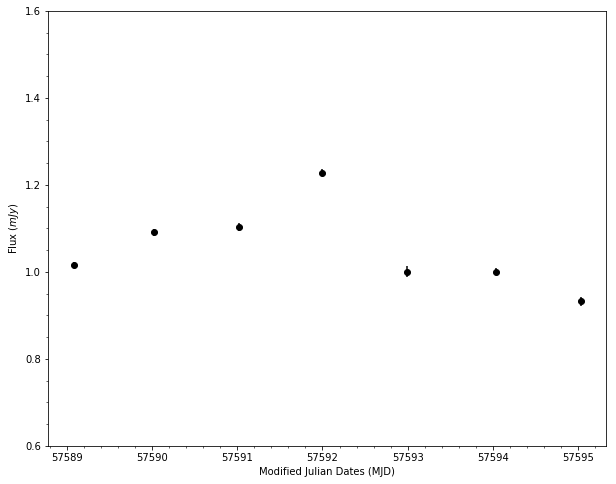

In [25]:
plt.figure(figsize=(10,8))
plt.errorbar(dt['mjd'],dt['re'],yerr=dt['ure'],color='k',fmt='o')
plt.ylim(.6,1.6)
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux ($mJy$)')
plt.minorticks_on()
#plt.savefig('plots/1314Daily.png')
plt.show()


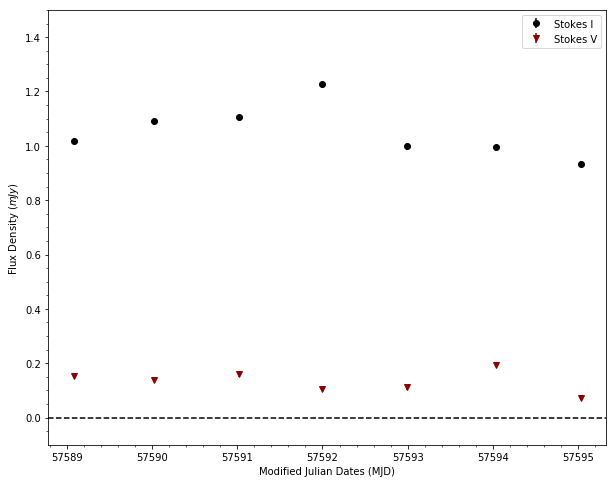

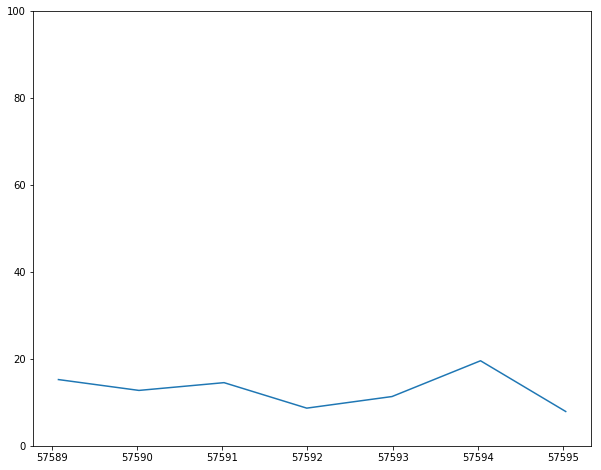

12.845163683162099

In [92]:
# The 7 GHz band
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/*-LL.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

ll = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
ll = ll.sort_values(by=['mjd']).reset_index()

# The 5 GHz Band
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/*-RR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

rr = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
rr = rr.sort_values(by=['mjd']).reset_index()

stV = (rr['re']-ll['re'])*0.5
stI = (rr['re']+ll['re'])*0.5
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5


plt.figure(figsize=(10,8))
plt.errorbar(rr['mjd'],stI,yerr=stErr,fmt='o',color='black',label='Stokes I')
plt.errorbar(rr['mjd'],stV,yerr=stErr,fmt='v',color='darkred',label='Stokes V')
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux Density ($mJy$)')
plt.legend(loc='best')
plt.axhline(y=0,color='k',linestyle='dashed')
plt.minorticks_on()
plt.ylim(-0.1,1.5)
plt.savefig('plots/1314Daily.png')
plt.show()

plt.figure(figsize=(10,8))
plt.ylim(0,100)
plt.plot(rr['mjd'],(stV/stI)*100)
plt.show()

np.mean((stV/stI)*100)

In [88]:
print(stErr)

0    0.007678
1    0.007378
2    0.009148
3    0.008058
4    0.012229
5    0.007914
6    0.010475
Name: ure, dtype: float64


1.2247189881769562


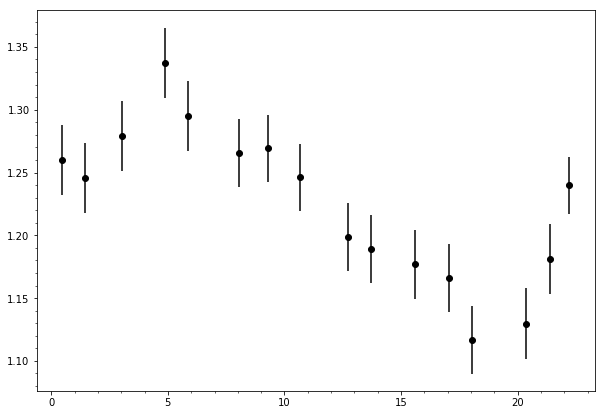

In [68]:
e4 = pd.read_table('1314/daily/2M1314de4-LLRR.dat')

e4 = e4[e4['nsamp']>5000]

e4 = binning(e4,60)

print(e4['re'].mean())

plt.figure(figsize=(10,7))
plt.errorbar(e4['dtmin'],e4['re'],yerr=e4['ure'],color='black',linestyle='none',marker='o')
plt.minorticks_on()
plt.show()

#### 

In [26]:
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/*-7GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

high = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
high = high.sort_values('mjd')

In [41]:
high

,mjd,re,ure
2,57589.079052,0.917810,0.010139
5,57590.023889,0.000183,0.009782
1,57591.022223,-0.009385,0.011589
0,57591.992813,-0.007351,0.010800
3,57592.993497,-0.008909,0.016502
4,57594.032138,0.003405,0.010155
6,57595.031702,0.002060,0.015268


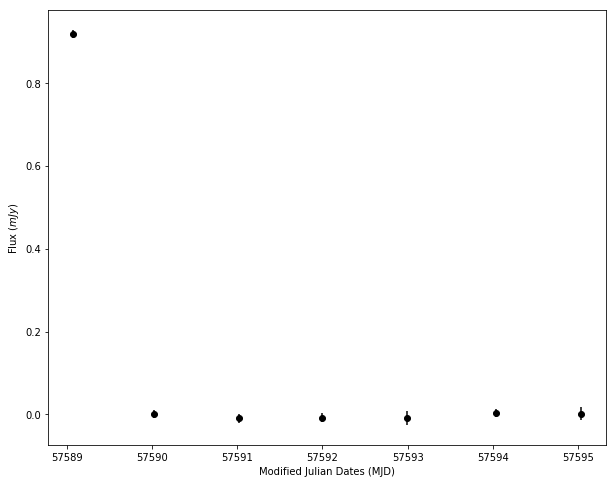

In [47]:
plt.figure(figsize=(10,8))
plt.errorbar(high['mjd'],high['re'],yerr=high['ure'],fmt='o',color='k',)
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux ($mJy$)')
plt.show()

In [44]:
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/*-5GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

low = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
low = low.sort_values('mjd')

mjd = []
flux = []
err = []


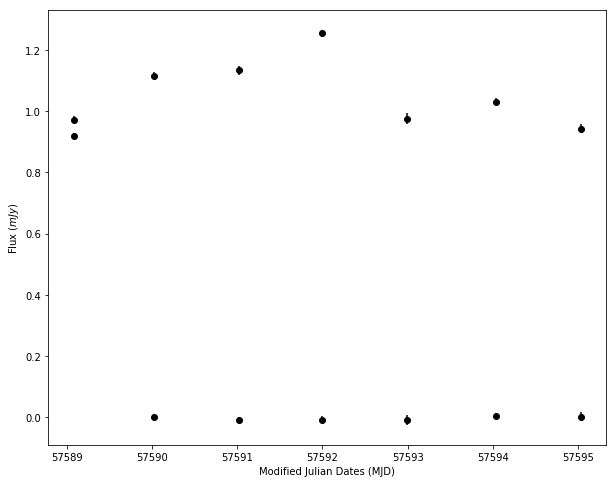

In [48]:
plt.figure(figsize=(10,8))
plt.errorbar(low['mjd'],low['re'],yerr=low['ure'],fmt='o',color='k')
plt.errorbar(high['mjd'],high['re'],yerr=high['ure'],fmt='o',color='k')
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux ($mJy$)')
plt.show()

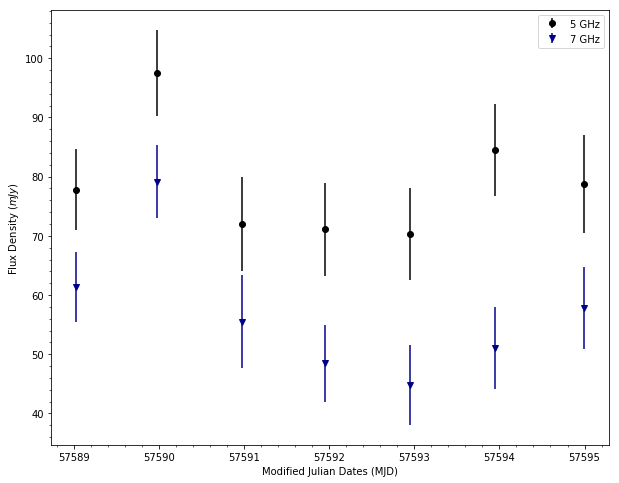

In [21]:
# The 7 GHz band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-7GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

high = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
high = high.sort_values(by=['mjd'])

# The 5 GHz Band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-5GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

low = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
low = low.sort_values(by=['mjd'])

plt.figure(figsize=(10,8))
plt.errorbar(low['mjd'],low['re'],yerr=low['ure'],fmt='o',color='black',label='5 GHz')
plt.errorbar(high['mjd'],high['re'],yerr=high['ure'],fmt='v',color='darkblue',label='7 GHz')
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux Density ($\mu Jy$)')
plt.legend(loc='best')
plt.minorticks_on()
plt.plots('plots/1315Daily_sed.png')
plt.show()

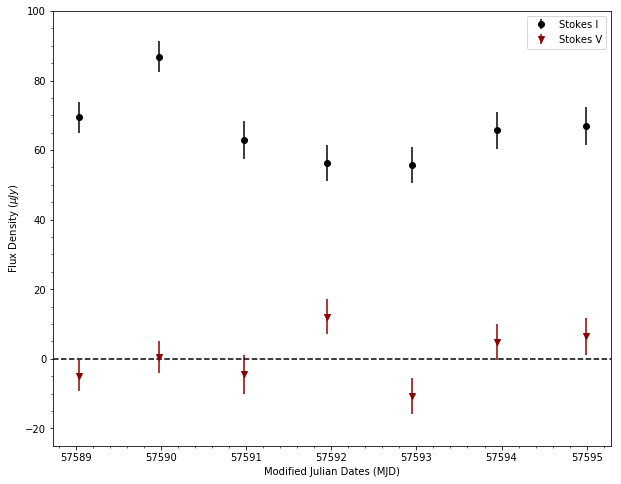

In [86]:
# The 7 GHz band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-LL.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

ll = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
ll = ll.sort_values(by=['mjd']).reset_index()

# The 5 GHz Band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-RR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

rr = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
rr = rr.sort_values(by=['mjd']).reset_index()

stV = (rr['re']-ll['re'])*0.5
stI = (rr['re']+ll['re'])*0.5
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5


plt.figure(figsize=(10,8))
plt.errorbar(rr['mjd'],stI,yerr=stErr,fmt='o',color='black',label='Stokes I')
plt.errorbar(rr['mjd'],stV,yerr=stErr,fmt='v',color='darkred',label='Stokes V')
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux Density ($\mu Jy$)')
plt.legend(loc='best')
plt.axhline(y=0,color='k',linestyle='dashed')
plt.minorticks_on()
plt.ylim(-25,100)
plt.savefig('plots/1315Daily.png')
plt.show()

In [81]:
print(ll,'\n',rr)

            mjd         re       ure
0  57589.032140  74.312902  6.242508
3  57589.980882  86.278234  6.443619
6  57590.978147  67.382403  7.871269
1  57591.951170  44.214211  7.143689
4  57592.951920  66.562644  7.316579
5  57593.948027  60.809437  7.311854
2  57594.990080  60.558357  7.589027 
             mjd         re       ure
3  57589.032086  64.659218  6.378755
1  57589.980882  87.402307  6.397680
4  57590.978147  58.423644  7.886181
5  57591.951170  68.370503  7.107098
6  57592.951920  45.086014  7.288609
2  57593.948027  70.492338  7.425387
0  57594.990080  73.409395  7.664608


In [49]:
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-LLRR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

dt = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
dt = dt.sort_values('mjd')
print(dt)

            mjd         re       ure
1  57589.032129  66.994502  4.350066
6  57589.980882  86.714714  4.544972
3  57590.978147  63.007648  5.577524
4  57591.951170  57.837408  5.067905
5  57592.951920  55.623991  5.169450
2  57593.948027  65.630238  5.217662
0  57594.990080  66.821539  5.390546


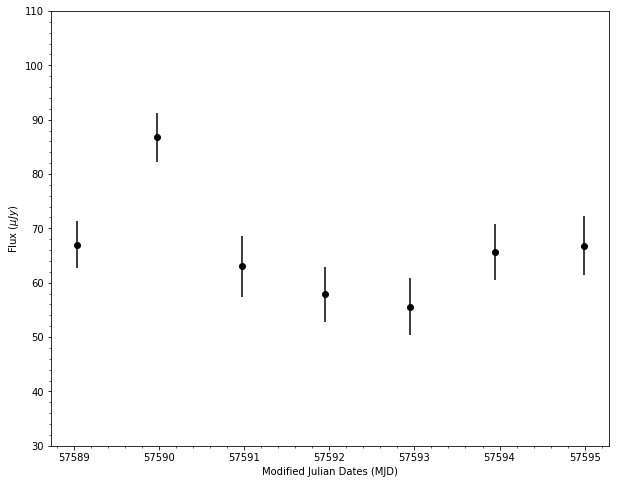

In [50]:
plt.figure(figsize=(10,8))
plt.errorbar(dt['mjd'],dt['re'],yerr=dt['ure'],color='k',fmt='o')
plt.ylim(30,110)
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux ($\mu Jy$)')
plt.minorticks_on()
plt.savefig('plots/1315Daily.png')
plt.show()

In [82]:
avg = pd.read_table('1315/daily/2M1315de2-LLRR.dat')
ll = pd.read_table('1315/daily/2M1315de2-LL.dat')
rr = pd.read_table('1315/daily/2M1315de2-RR.dat')

stI = (ll['re'].mean()+rr['re'].mean())*.5


print(avg['re'].mean(),ll['re'].mean(),rr['re'].mean(),stI)

86.71471374182835 86.27823357590027 87.40230717988831 86.84027037789429


In [59]:
86.7/62.65

1.383878691141261

In [29]:
'''
Defining our model, likelihoood, and prior functions
'''
def linearModel(theta,x):
    '''
    Linear model fitting to the data
    '''
    m,b = theta
    y = m*x+b
    return y

def lnprior(theta):
    '''
    Uniform priors for m and b constrained by the data
    '''
    m,b = theta
    if -1 < m < 1 and 50 < b < 100:
        return 0.0
    return -np.inf

def lnlike(theta,x,y,yerr):
    '''
    Log of the likelihood function (chi^2)
    '''
    return -0.5*(np.sum((y-linearModel(theta,x))**2/yerr**2))

def lnprob(theta,x,y,err):
    '''
    Putting prior and likelihood together
    '''
    lnp = lnprior(theta)
    if not np.isfinite(lnp):
        return -np.inf
    return lnp + lnlike(theta,x,y,yerr)

In [35]:
# Putting data to variables
x = dt['mjd']
y = dt['re']
yerr = dt['ure']

In [36]:
# Optimizing the lnlikelihood
# Minimize to -log of the likelihood to maximize the likelihood
nll = lambda *args: -lnlike(*args)
x0 = [5,3]
linearResult = op.minimize(nll,x0,args=(x,y,yerr))
m_ml,b_ml = linearResult.x
print(m_ml,b_ml)


-2.0286847474873633 116905.93917851851


In [34]:
e2 = pd.read_table('1315/daily/2M1315de2-LLRR.dat')

e2 = binning(e2,240)

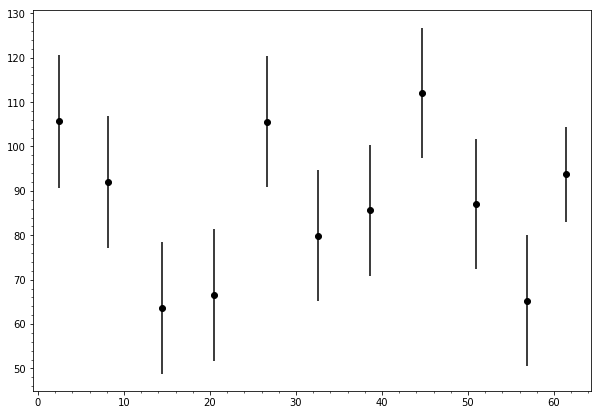

In [35]:
plt.figure(figsize=(10,7))
plt.errorbar(e2['dtmin'],e2['re'],yerr=e2['ure'],color='black',linestyle='none',marker='o')
plt.minorticks_on()
plt.show()

In [19]:
ll = pd.read_table('1315/daily/2M1315de2-LL.dat')
rr = pd.read_table('1315/daily/2M1315de2-RR.dat')

ll = binning(ll,150)
rr = binning(rr,150)


stI = (rr['re']+ll['re'])*.5
stV = (rr['re']-ll['re'])*.5
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5

frac = stV/stI
fracErr = np.abs(frac)*np.sqrt((stErr/stI)**2+(stErr/stV)**2)
time = rr['dtmin']

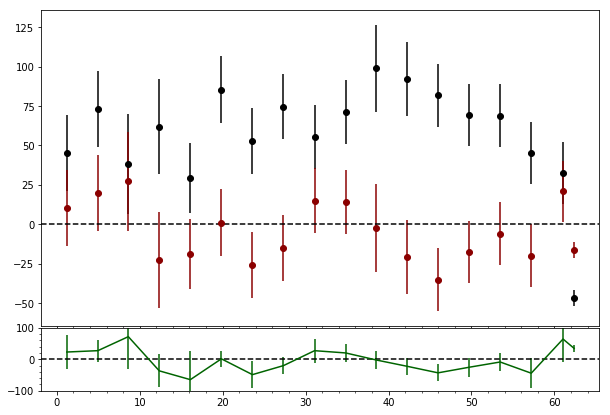

In [49]:
fig,ax=plt.subplots(nrows=2,ncols=1,sharex=True,gridspec_kw= {'hspace':.01,'height_ratios':[5,1]},figsize=(10,7))
ax[0].errorbar(time,stI,yerr=stErr,color='black',linestyle='none',marker='o')
ax[0].errorbar(time,stV,yerr=stErr,color='darkred',linestyle='none',marker='o')
ax[0].axhline(y=0,color='black',linestyle='dashed')
ax[1].errorbar(time,100*frac,yerr=100*fracErr,color='darkgreen')
ax[1].axhline(y=0,color='black',linestyle='dashed')
ax[1].set_ylim(-100,100)
plt.minorticks_on()
plt.show()

In [23]:
stI

-0.0      81.961919
 1.0     113.546289
 2.0     111.520909
 3.0      70.258368
 4.0      54.723648
 5.0      74.461460
 6.0      89.803140
 7.0      90.992930
 8.0      51.226489
 9.0     101.236111
 10.0    109.816915
 11.0     79.727667
 12.0    120.716591
 13.0     76.611464
 14.0     97.467337
 15.0     62.278067
 16.0     90.411449
Name: re, dtype: float64

In [13]:
dt

,mjd,re,ure
1,57589.032129,66.994502,4.350066
6,57589.980882,86.714714,4.544972
3,57590.978147,63.007648,5.577524
4,57591.951170,57.837408,5.067905
5,57592.951920,55.623991,5.169450
2,57593.948027,65.630238,5.217662
0,57594.990080,66.821539,5.390546


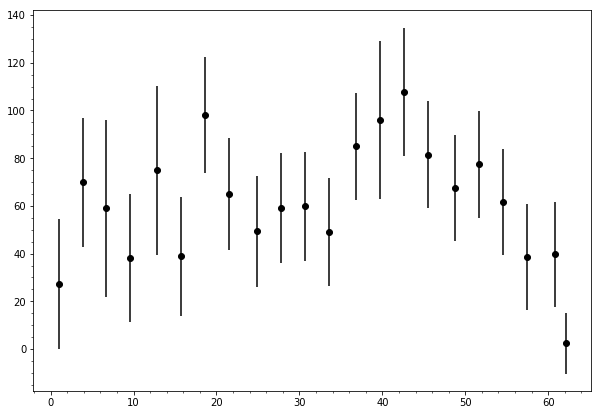

In [33]:
e3 = pd.read_table('1315/daily/2M1315de3-LLRR.dat')
e3 = binning(e3,120)

plt.figure(figsize=(10,7))
plt.errorbar(e3['dtmin'],e3['re'],yerr=e3['ure'],color='black',linestyle='none',marker='o')
plt.minorticks_on()
plt.show()

In [35]:
ll = pd.read_table('1315/daily/2M1315de3-LL.dat')
rr = pd.read_table('1315/daily/2M1315de3-RR.dat')

ll = binning(ll,150)
rr = binning(rr,150)


stI = (rr['re']+ll['re'])*.5
stV = (rr['re']-ll['re'])*.5
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5

frac = stV/stI
fracErr = np.abs(frac)*np.sqrt((stErr/stI)**2+(stErr/stV)**2)
time = rr['dtmin']

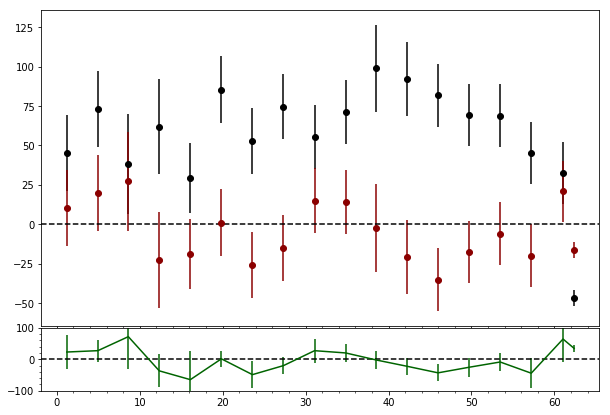

In [37]:
fig,ax=plt.subplots(nrows=2,ncols=1,sharex=True,gridspec_kw= {'hspace':.01,'height_ratios':[5,1]},figsize=(10,7))
ax[0].errorbar(time,stI,yerr=stErr,color='black',linestyle='none',marker='o')
ax[0].errorbar(time,stV,yerr=stErr,color='darkred',linestyle='none',marker='o')
ax[0].axhline(y=0,color='black',linestyle='dashed')
ax[1].errorbar(time,100*frac,yerr=100*fracErr,color='darkgreen')
ax[1].axhline(y=0,color='black',linestyle='dashed')
ax[1].set_ylim(-100,100)

plt.minorticks_on()
plt.show()